## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

## Implementar K-means simples do zero

### Descrição

Implementar uma versão simples do K-means do zero. Por simples, deve-se entender que nenhuma das otimizações do K-means precisa ser implementada. Assume-se que deverá ser criada uma função que receba como parâmetros o número de clusters `k`, o conjunto de dados em formato Numpy `X`, e um parâmetro `random_state`, retornando os centróides finais e os labels. Os centróides devem ser um Numpy array e os labels devem ser uma lista, onde cada elemento é um inteiro representando o cluster.

```python
def do_kmeans_clustering(k, X, random_state):
  # seu código aqui
  return centroids, final_clusters
```

### Requisitos

* Criar método com nome `do_kmeans_clustering`, que receba um parâmetro `k`, um parâmetro `X` e um parâmetro `random_state`, representando número de clusters, dados e inteiro a ser usado como seed (para função `random`), respectivamente.
* O método deve possuir dois retornos, sendo que o primeiro são os centróides e segundo são os grupos finais. O formato de retorno dos grupos finais é livre.
* Assuma que `X` terá shape `(num_instances, num_features)`, onde `n_features = 2`.
* Assuma que os centróides finais tenham shape `(k, num_features)`.
* Assuma que os clusters (labels) sejam uma lista de tamanho `num_instances`.
* A inicialização dos centróides dos clusters deve ser aleatória e baseada no `random_state`.
* O algoritmo deve executar até que os clusters não mudem. Portanto, não temos um número máximo de iterações.
* Deve conter ao menos um método de plot para verificar os grupos finais em relação aos dados.
* A base de dados usada é sintética e para tal deve ser utilizado o método `make_blobs` do `sklearn.datasets.sample_generator`

## Implementação

### Imports
Utilizar bibliotecas que achar mais pertinente. Lembre-se dos detalhes do matplotlib e do seaborn para utilizá-los em notebooks (ver outros notebooks da aula).

In [1]:
### escreva seu código aqui
import random
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

sns.set(style="ticks", color_codes=True)


### Criar base de dados sintética
Utilizar o método `make_blobs` do ScikitLearn com os parâmetros já fornecidos. Informar `random_state` como `100`

In [2]:
centers = 3
n_features = 2
n_samples = 300

### escreva seu código aqui
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features, random_state=100)
d = {'x': X[:,0], 'y':X[:,1],  'classes':y}
df = pd.DataFrame(data=d)

### Plotar a base de dados inicial
Dica: lembre-se que utilizamos o `sns.scatterplot` e utilizando o dataset como um Pandas dataframe. Caso tenham dúvidas, revise os notebooks da aula.

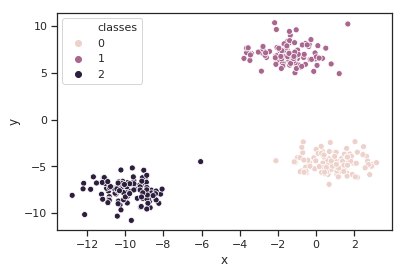

In [3]:
### escreva seu código aqui
sns.scatterplot(x="x", y="y", hue='classes', data=df);

### K-means

In [54]:
class Centroid:
    def __init__(self, name, _min, _max, pos = None):
        self.name = name
        if pos == None:
            self.position = [random.uniform(_min[0],_max[0]), random.uniform(_min[1],_max[1])]
        else:
            self.position = pos 
        self.points = []

class Kmean:
    def __init__(self, points, max_iterations=1000, k = 3, random_state=1, batch_size=1):
        random.seed(random_state)
        self.batch_size = batch_size
        self.points = points
        self.shape = [len(points), len(points[0])]
        self.iterations = max_iterations
        _min, _max = self.generate_balance()
        self.min = _min
        self.max = _max
        self.centroids = self.init_groups(n=k)

        
    def generate_balance(self):
        _min = []
        _max = []
        for i in range(self.shape[1]):
            _min += [min(self.points[:,i])]
            _max += [max(self.points[:,i])]
        return _min,_max
    
    def init_groups(self, n):
        g = []
        for i in range(0,n):
            c = Centroid(name=i, _min = self.min, _max = self.max)
            g.append( c )
        return g

    def clear_centroids(self):
        for i in range(len(self.centroids)):
            self.centroids[i].points = []
        
    def calculate_distance(self, a, b):
        return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1], 2))

    def find_the_closest_group(self, point):
        closest_group = self.centroids[0]
        closest_distance = self.calculate_distance(point, closest_group.position)
        for i in range(1,len(self.centroids)):
            aux = self.calculate_distance(point, self.centroids[i].position)
            if(aux < closest_distance):
                closest_distance = aux
                closest_group = self.centroids[i]
        closest_group.points.append(point)
        return closest_group.name
            
    def recalculate_group_position(self, group):
        pre_position = group.position
        n = len(group.points)
        if n == 0:
            return
        x = 0
        y = 0
        for i in range(n):
            x = x + group.points[i][0]
            y = y + group.points[i][1]
        x = x/n
        y = y/n
        group.position = [x, y]


    def get_centroids_position(self):
        p = []
        for centroid in self.centroids:
            p += [centroid.position]
        return p
    
    def continue_condition(self,group, prev_position):
        if (abs(group.position[0] - prev_position[0]) < 0.01) and (abs(group.position[1] - prev_position[1]) < 0.01):
            return False
        else :
            return True
        
    def check_should_continue(self, prev_positions):
        stop = False
        for i, centroid in enumerate(self.centroids):
            stop = stop or self.continue_condition(centroid, prev_positions[i])
        return stop
            
    def run(self):
        n_observations = len(self.points)
        for _ in range(self.iterations):
            self.clear_centroids()
            labels = []
            centoid_positions_initial = self.get_centroids_position()
            for i in range(n_observations):
                centroids = []
                label = self.find_the_closest_group(self.points[i])
                labels += [ label ]
                if (i+1)%self.batch_size == 0 or i == (n_observations-1):
                    for i in range(len(self.centroids)):
                        self.recalculate_group_position(self.centroids[i])
                        centroids += [self.centroids[i].position]
            shoud_continue = self.check_should_continue(centoid_positions_initial)
            if not shoud_continue:
                return centroids,  labels
        return  centroids,  labels

def do_kmeans_clustering(k, X, random_state):
    kmean = Kmean(X, k=k, random_state=random_state, batch_size = 1)
    centroids, labels = kmean.run()
    return np.array(centroids), np.array(labels)

### Treinamento

Realizar treinamento com `k = 3` e `random_state = 30`.

In [55]:
### escreva seu código aqui
centroids, labels = do_kmeans_clustering(3,X,30)

### Plotar grupos resultantes

Utilizar dois métodos: `sns.scatterplot` para os dados e `plt.scatter` para os centróides. Caso tenha dúvidas, revise os exemplos dos notebooks da aula.

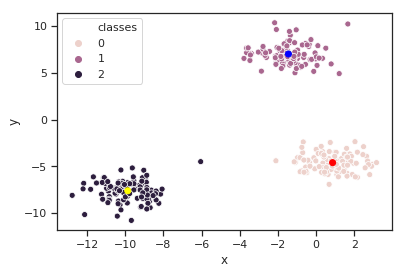

In [56]:
### escreva seu código aqui
d = {'x': X[:,0], 'y':X[:,1],  'classes':labels}
output = pd.DataFrame(data=d)
sns.scatterplot(x="x", y="y", hue='classes', data=output);
plt.scatter(centroids[:,0], centroids[:,1], alpha=1, color=['red', 'blue', 'yellow'])

### Pergunta

Após finalizar a implementação, faça testes com diferentes valores para o `random_state`. O que você pode observar?

### Resposta

Pode-se notar que alterando o random_state a formação de clusters varirou bastante, principalmente quando alterando o parametro de batch_size que inclui na implementação. Mesmo com o batch_size = 1 houveram muitas alterações em que centroid caiu em qual posição. 